# Librerias

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, iradon
from scipy.ndimage import zoom
import numpy as np

## Transformada de Radon

In [36]:
def GetRadonTransforms(img,start_phi, stop_phi, step):
  angle_arr = np.arange(start=start_phi,stop=stop_phi+0.1,step=step)
  print(angle_arr)
  projections = radon(img, theta=angle_arr)
  return projections

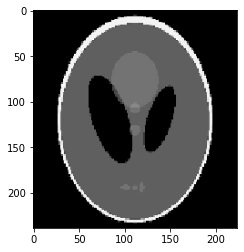

(239, 224)
[ 0. 45. 90.]


/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


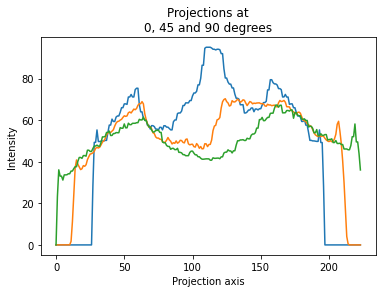

In [37]:
img = imread("Proyeccion.PNG", as_gray=True)
img[img<0.2] = 0
plt.imshow(img,cmap="gray")
plt.show()
print(img.shape)
start_phi = 0
stop_phi = 90
step=45
projections = GetRadonTransforms(img,start_phi, stop_phi, step)
plt.plot(projections)
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
plt.show()